# Focal mechanism calculation using `SKHASH` file format

**Make P-polarity input file i.e., `pol_consensus.csv` file.**

columns:\
        `event_id,event_id2,station,location,channel,p_polarity,origin_latitude,origin_longitude,origin_depth_km`



**pyrocko marker to skshash pol_concensus for individual event marker file.
This is my old  filing system. I make 1 marker file for one event. Now, i have a master marker file for all events.**

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyperclip

from classes_functions.my_class_funcs import SkhashRunner
%reload_ext autoreload
%autoreload 2

In [16]:
# Set up directory
project_dir = f"{os.getcwd()}/.."
skhash_dir = f"{project_dir}/code/SKHASH2/SKHASH"  ## SKHASH2 is the most recent version
skhash_example_dir = f"{skhash_dir}/examples"
skhash_mtj_dir = f'{skhash_dir}/examples/maacama_SKHASH_MTJ'

############## CHECK THE FILE NAMES CAREFULLY TO MAKE SURE THEY ARE THE MOST RECENT ONES ############################

if input('Did you check the file names? (y/n)') == 'y':
    all_picks_file = f'{project_dir}/results/phasenet_diting_others/phasenet_files/' + 'ALL_PICKS_POL_921_mag_dist_verified.csv'

    eq_cat_file = f'{project_dir}/data/eq_data/1_eq_catalogs/' + 'usgs_eq_above_slab2_all.csv'

    inv_file = f'{project_dir}/data/eq_data/3_station_catalogs/' + '00_station_inventory_master_921.txt'

    output_path = f'{skhash_mtj_dir}/IN'

else:
    sys.exit()

# Create SkHASH format files

In [17]:
out_id = "all_MLA_921"        # **************** Very important to change this for each run ****************
if input(f'Output ID is {out_id}. Are you sure you want to continue? (y/n)') != 'y':
    sys.exit()
%reload_ext autoreload
%autoreload 2
from classes_functions.my_class_funcs import SkhashRunner

skrun = SkhashRunner()


### Polarity file [SKHASH format]


In [18]:
skhash_pol_df_pyroko = skrun.PhaseNet2SKHASH_polarity(
    eq_cat_file,
    all_picks_file,  
    manual_AI_commons_only=False, pyrocko_only=False, 
    events_in_cataglog_only=False,
    output_path=None)

# drop rows with empty p_polarity
# skhash_pol_df_pyroko = skhash_pol_df_pyroko.dropna(subset=['p_polarity'])
skhash_pol_df_pyroko = skhash_pol_df_pyroko[skhash_pol_df_pyroko.station != 'LST2']

outdir = f"{skhash_mtj_dir}/IN/pol_concensus_{out_id}.csv"
skhash_pol_df_pyroko.to_csv(outdir, index=False)

print(outdir)

skhash_pol_df_pyroko.event_id.unique().shape

Reading the PhaseNet picks file
Total number of events: 911


/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/classes_functions/my_class_funcs.py:965: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  skhash_pol_df = pd.concat([skhash_pol_df, event_df], ignore_index=True)


/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../code/SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/IN/pol_concensus_all_MLA_921.csv


(901,)

### Station file [SKHASH format]


In [19]:
skhash_station_df = skrun.make_SKHASH_station_file(given_inventory=inv_file, #skhash_polarity_file=f"{skhash_mtj_dir}/IN/pol_concensus_pyroko.csv",
    keep_Z_only = True, drop_duplicates = True, output_path = None,
    )

skhash_station_df.to_csv(f"{skhash_mtj_dir}/IN/station_all_921.csv", index=False)
print(f"{skhash_mtj_dir}/IN/station_all_921.csv")

Using the provided merged inventory file: /Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../data/eq_data/3_station_catalogs/00_station_inventory_master_921.txt
/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../code/SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/IN/station_all_921.csv


### Reverse file [SKHASH format]


In [20]:
skhash_reverse_df = skrun.make_skhash_reverse_file(f"{skhash_mtj_dir}/IN/pol_concensus_pyroko.csv", output_path=None) # make sure the polarity file has been created
skhash_reverse_df.to_csv(f"{skhash_mtj_dir}/IN/reverse_pyroko.csv", index=False)

### Make control file [SKHASH format]

In [21]:
control_file = skrun.edit_skhash_control_file(
    # input files
    conpfile = f'examples/maacama_SKHASH_MTJ/IN/pol_concensus_{out_id}.csv',
    stfile = 'examples/maacama_SKHASH_MTJ/IN/station_all_921.csv',

    # output files
    outfile1 = f'examples/maacama_SKHASH_MTJ/OUT/out_{out_id}.csv',
    outfile2 = f'examples/maacama_SKHASH_MTJ/OUT/out2_{out_id}.csv',
    outfile_pol_agree = f'examples/maacama_SKHASH_MTJ/OUT/out_polagree_{out_id}.csv',
    outfile_pol_info = f'examples/maacama_SKHASH_MTJ/OUT/out_polinfo_{out_id}.csv',
    outfolder_plots = f'examples/maacama_SKHASH_MTJ/OUT/plots_{out_id}',
    delmax = 150, # 100km limit
    plot_station_names = True,
    plot_acceptable_solutions = True,
)

# Ginny NCEDC polarities

In [22]:
# ginny_dir = 'SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/IN/MTJ_NCEDC_Ginny'
# ncedc_pol_file = f'{ginny_dir}/polarity.csv'
# ncedc_cat_file = f'{ginny_dir}/MTJ_catalog.csv'
# ncedc_pol_df = pd.read_csv(ncedc_pol_file)
# ncedc_cat_df = pd.read_csv(ncedc_cat_file)

# # add these ['origin_latitude', 'origin_longitude', 'origin_depth_km'] columns to the ncedc_pol_df with np.nan
# ncedc_pol_df['origin_latitude'], ncedc_pol_df['origin_longitude'], ncedc_pol_df['origin_depth_km'] = np.nan, np.nan, np.nan

# for group_id, group_df in ncedc_pol_df.groupby('event_id'):
#     if group_id in ncedc_cat_df.event_id.values:
#         ncedc_pol_df.loc[
#             ncedc_pol_df.event_id == group_id, ['origin_latitude', 'origin_longitude', 'origin_depth_km']
#             ] = ncedc_cat_df.loc[
#                 ncedc_cat_df.event_id == group_id, ['latitude', 'longitude', 'depth']
#                 ].values[0]

# ncedc_pol_df.dropna(subset=['origin_latitude'], inplace=True)
# ncedc_pol_df.to_csv(f'{ginny_dir}/polarity_skhash.csv', index=False)

In [23]:
# from classes_functions.my_class_funcs import SkhashRunner

# skrun = SkhashRunner()
# # out_id = "NCEDC_Ginny"
# control_file = skrun.edit_skhash_control_file(
#     conpfile = f'examples/maacama_SKHASH_MTJ/IN/MTJ_NCEDC_Ginny/polarity_skhash.csv',
#     stfile = 'examples/maacama_SKHASH_MTJ/IN/MTJ_NCEDC_Ginny/MTJ_stations.csv',
    
#     outfile1 = f'examples/maacama_SKHASH_MTJ/OUT/out_{out_id}.csv',
#     outfile2 = f'examples/maacama_SKHASH_MTJ/OUT/out2_{out_id}.csv',
#     outfile_pol_agree = f'examples/maacama_SKHASH_MTJ/OUT/out_polagree_{out_id}.csv',
#     outfile_pol_info = f'examples/maacama_SKHASH_MTJ/OUT/out_polinfo_{out_id}.csv',
#     outfolder_plots = f'examples/maacama_SKHASH_MTJ/OUT/plots_{out_id}',
#     plot_station_names = True,
#     plot_acceptable_solutions = True,
# )

### Write control file

In [24]:
# write the control file into a text file   
control_file_path = f'{skhash_mtj_dir}/controlfile_{out_id}.txt'
with open(control_file_path, 'w') as f:
    f.write(control_file)

print(control_file_path)

/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/../code/SKHASH2/SKHASH/examples/maacama_SKHASH_MTJ/controlfile_all_MLA_921.txt


# Run SkHash in bash
cd into SkHash folder and run the following code in terminal

In [25]:
bash_script = f"""#!/bin/bash
cd {skhash_dir}

# Activate conda pythoon environment named 'phasenet' [********change miniconda3 to anaconda3 if using Anaconda]
source ~/miniconda3/etc/profile.d/conda.sh # or source ~/anaconda3/etc/profile.d/conda.sh in case of Anaconda
# conda init
conda activate obspy

python3 SKHASH.py examples/maacama_SKHASH_MTJ/controlfile_{out_id}.txt
"""

with open(f'{skhash_dir}/run_skhash.sh', 'w') as f:
    f.write(bash_script)

# Make the script executable
print("Making the script executable...")
os.system(f"chmod +x {skhash_dir}/run_skhash.sh")

Making the script executable...


0

In [26]:
# Run the script
run = input("Do you want to run SkHASH now? (y/n): ")
# run = "y"
if run.lower() == "y":
    print("Running SKHASH...")
    os.system(f"{skhash_dir}/run_skhash.sh")
else:
    print("SKHASH will not be run. Exiting...")

Running SKHASH...
SKHASH v0.1 (2024-02-16)
Control file: examples/maacama_SKHASH_MTJ/controlfile_all_MLA_921.txt
Discarded 14 of the 7045 polarity measurements with source-receiver distances >150 km
Discarded 471 earthquakes with fewer than 8 polarities.
Creating lookup table (0/0): examples/velocity_models_MTJ/vz.MTJ.txt
	Created table.
Computing mechanisms in parallel...
0 / 429	(nc40214567)
	Maximum azimuthal gap (164.951) > max_agap (135). Skipping.
2 / 429	(nc40215740)
	Maximum azimuthal gap (285.288) > max_agap (135). Skipping.
*sdr_from_vector warning, horz fault, strike undefined
*sdr_from_vector warning, horz fault, strike undefined
6 / 429	(nc40221138)
	S: 326.2745   D: 56.4255   R: -141.7899   U: 49.4939   Q: D
	Runtime: 3.11 sec
5 / 429	(nc40221128)
	S: 299.3451   D: 65.3042   R: -159.6162   U: 44.016   Q: D
	Runtime: 3.17 sec
4 / 429	(nc40220957)
	S: 117.1007   D: 85.5092   R: 176.1233   U: 36.7386   Q: B
	Runtime: 3.25 sec
*sdr_from_vector warning, horz fault, strike unde

multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/Users/mdarifulislam/miniconda3/envs/obspy/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/SKHASH2/SKHASH/functions/compute_mech.py", line 38, in compute_mech
    takeoff=fun.lookup_takeoff(lookup_dict['table'],perturbed_origin_depth_km,sr_dist_km,p_dict['look_dep'],p_dict['look_del'],lookup_dict['deptab'],lookup_dict['delttab'],num_velocity_models=len(p_dict['vmodel_paths']))
  File "/Users/mdarifulislam/Library/CloudStorage/OneDrive-IndianaUniversity/Research/Github/FM2STRESS/FM2STRESS_project/code/SKHASH2/SKHASH/functions/fun.py", line 71, in lookup_takeoff
    t2=table[ix1,id2,np.repeat([randomized_vm_ind],len(sr_dist_km),axis=0)]+\
IndexError: index 14 is out of bounds for axis 1 with size 14
"""

The above exception wa

In [27]:
# check the output file
out_file = f"{skhash_mtj_dir}/OUT/out_{out_id}.csv"
out_df = pd.read_csv(out_file).sort_values('quality', ascending=False, ignore_index=True)
out_df.head()

,event_id,strike,dip,rake,quality,fault_plane_uncertainty,aux_plane_uncertainty,num_p_pol,num_sp_ratios,polarity_misfit,prob_mech,sta_distribution_ratio,sp_misfit,mult_solution_flag
0,nc40215622,194.2821,74.8233,139.9715,D,54.3662,52.5770,8,0,28.3,19.0,59.9,0.0,False
1,nc73412801,317.8126,86.6625,142.1867,D,47.9479,52.1538,9,0,26.7,22.8,37.9,0.0,True
2,nc73412801,239.4984,84.3909,54.1403,D,48.9072,48.7602,9,0,0.0,27.0,37.7,0.0,True
3,nc73396966,141.0757,48.7950,140.9406,D,38.3850,38.1349,16,0,10.2,48.6,60.0,0.0,False
4,nc73347425,345.5378,63.2494,-129.3213,D,42.5673,46.0201,8,0,12.1,28.4,44.1,0.0,False


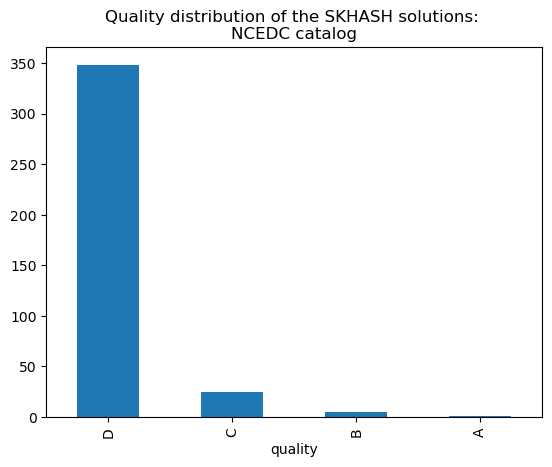

In [28]:
# each group how much percentage of the total
out_df['quality'].value_counts(normalize=False).plot(kind='bar')
plt.title('Quality distribution of the SKHASH solutions: \nNCEDC catalog')

plt.show()

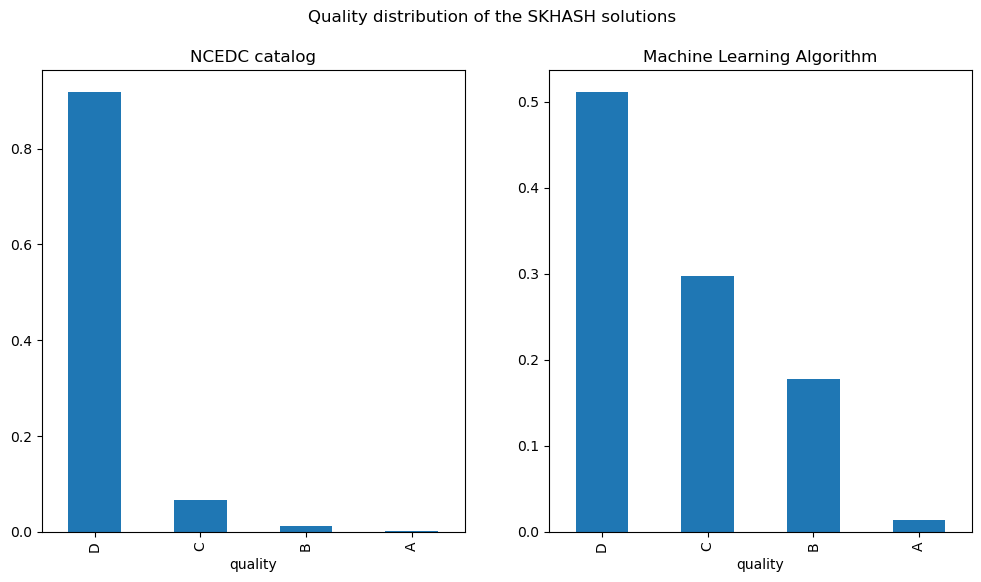

In [29]:
out_file = f"{skhash_mtj_dir}/OUT/out_all_MLA.csv"
mlout_df = pd.read_csv(out_file).sort_values('quality', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

out_df['quality'].value_counts(normalize=True).plot(kind='bar', ax=ax[0])
ax[0].set_title('NCEDC catalog')

mlout_df['quality'].value_counts(normalize=True).plot(kind='bar', ax=ax[1])
ax[1].set_title('Machine Learning Algorithm')


plt.suptitle('Quality distribution of the SKHASH solutions')
plt.show()
fig.savefig(f"../results/figures/skhash_qual_dist_NCEDC_vs_MLA.png", dpi=300)